In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('CocaCola_Sales_Rawdata.csv')

In [3]:
data.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
data.shape

(42, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714246
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

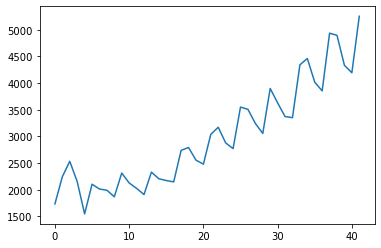

In [8]:
data.Sales.plot()

In [14]:
Train = data.head(38)
Test = data.tail(4)

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

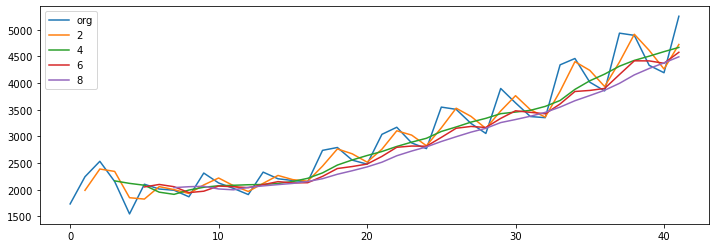

In [21]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

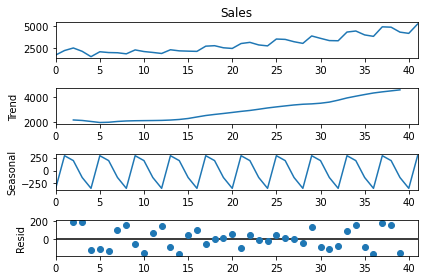

In [19]:
decompose_ts_add = seasonal_decompose(data.Sales,period=4)
decompose_ts_add.plot()
plt.show()

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots

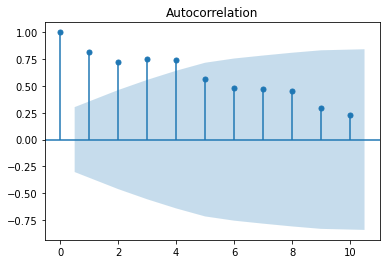

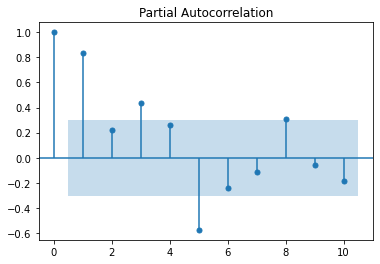

In [23]:
tsa_plots.plot_acf(data.Sales,lags=10)
tsa_plots.plot_pacf(data.Sales,lags=10)
plt.show()

In [24]:
def MAPE(pred,org):
    Sales= np.abs((pred-org)/org)*100
    return np.mean(Sales)

In [25]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


8.272017396351067

In [27]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

10.506484616130763

In [28]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

<ipython-input-28-3efabb31019e>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


1.983257694634351

In [29]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.3272123148459745

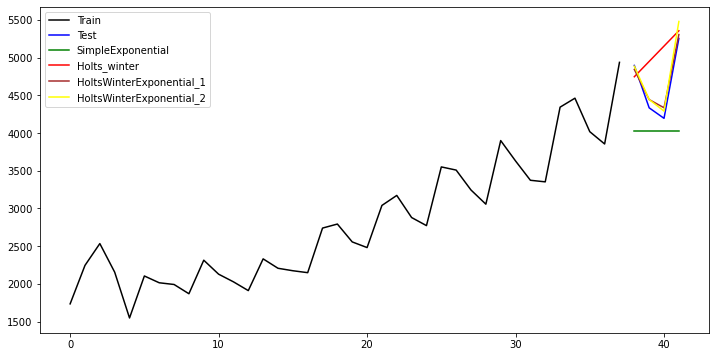

In [32]:
plt.figure(figsize=(12,6))
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [52]:
data1 = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([MAPE(pred_ses,Test.Sales),MAPE(pred_hw,Test.Sales),MAPE(pred_hwe_add_add,Test.Sales),MAPE(pred_hwe_mul_add,Test.Sales)])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
2,hwe_model_add_add,1.983258
3,hwe_model_mul_add,2.327212
1,hw_model,10.506485
0,ses_model,13.169737


In [33]:
hwe_model_add_add = ExponentialSmoothing(data["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()

<ipython-input-33-a66749447f5d>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add = ExponentialSmoothing(data["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
C:\Users\Sagar\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [34]:
hwe_model_add_add.forecast(4)

42    5198.197605
43    4661.451055
44    4535.844388
45    5606.048778
dtype: float64